#Họ và tên: Đỗ Tiến Đạt
#MSSV: 23120119
#Lớp: 23CTT2

#Một số lưu ý trước khi thực thi mã nguồn:
- Thực hiện phần cell code chứa `class Matrix` trước tiên.


In [13]:
class Matrix:
  def __init__(self, data: list[list[float]]):
    self.data = data
    self.row = len(data)
    self.col = len(data[0]) if data else 0

  def add(self, other: 'Matrix') -> 'Matrix':
    if self.row != other.row or self.col != other.col:
      raise ValueError('Matrix dimensions must match for addition.')
    return Matrix([
      [self.data[i][j] + other.data[i][j] for j in range(self.col)]
      for i in range(self.row)
    ])

  def subtract(self, other: 'Matrix') -> 'Matrix':
    if self.row != other.row or self.col != other.col:
      raise ValueError('Matrix dimensions must match for subtraction.')
    return Matrix([
      [self.data[i][j] - other.data[i][j] for j in range(self.col)]
      for i in range(self.row)
    ])

  def multiply(self, other: 'Matrix') -> 'Matrix':
    if self.col != other.row:
      raise ValueError('Matrix multiplication requires compatible dimensions.')
    return Matrix([
      [sum(self.data[i][k] * other.data[k][j] for k in range(self.col))
        for j in range(other.col)]
      for i in range(self.row)
    ])

  def multiply_scalar(self, scalar: float) -> 'Matrix':
    return Matrix([
      [self.data[i][j] * scalar for j in range(self.col)]
      for i in range(self.row)
    ])

  def transpose(self) -> 'Matrix':
    return Matrix([
      [self.data[i][j] for i in range(self.row)]
      for j in range(self.col)
    ])

  def inverse(self) -> 'Matrix':
    if self.row != self.col:
      raise ValueError('Matrix must be square to invert.')

    n = self.row
    A_ext = [self.data[i] + [float(i == j) for j in range(n)] for i in range(n)]

    for i in range(n):
      # find pivot differ with 0
      if A_ext[i][i] == 0:
        for j in range(i + 1, n):
          if A_ext[j][i] != 0:
            A_ext[i], A_ext[j] = A_ext[j], A_ext[i]
            break
        else:
          raise ValueError('Matrix is not invertible.')

      pivot = A_ext[i][i] # normalize the pivot row
      A_ext[i] = [x / pivot for x in A_ext[i]]

      for j in range(n):
        if j != i:
          factor = A_ext[j][i]
          A_ext[j] = [a - factor * b for a, b in zip(A_ext[j], A_ext[i])]

    # result
    I = [row[n:] for row in A_ext]
    return Matrix(I)

  def gauss_jordan(self) -> 'Matrix':
    m = self.row
    n = self.col
    A_copy = Matrix([row[:] for row in self.data])
    eps = 1e-12

    r = 0
    for c in range(n):  # column pointer
      # Find the row with the largest value in column c at or below row r
      pivot_row = None
      max_val = eps
      for i in range(r, m):
        if abs(A_copy.data[i][c]) > max_val:
            max_val = abs(A_copy.data[i][c])
            pivot_row = i
      if pivot_row is None:
        continue  # skip this column, no pivot found
      # Swap current row with pivot_row
      if pivot_row != r:
        A_copy.data[r], A_copy.data[pivot_row] = A_copy.data[pivot_row], A_copy.data[r]
      # Normalize the pivot row
      pivot = A_copy.data[r][c]
      A_copy.data[r] = [x / pivot for x in A_copy.data[r]]
      # Eliminate all other rows in column c
      for i in range(m):
        if i != r:
            factor = A_copy.data[i][c]
            A_copy.data[i] = [a - factor * b for a, b in zip(A_copy.data[i], A_copy.data[r])]
      r += 1
      if r == m:
        break
    return A_copy

  def solve(self, b:'Matrix')->'Matrix':
    m, n = self.row, self.col
    Ab = [self.data[i][:] + [b.data[i][0]] for i in range(n)]
    augmented = Matrix(Ab)
    augmented = augmented.gauss_jordan()

    x = [0.0] * m
    for i in range(n):
      pivot_col = None
      for j in range(m):
        if abs(augmented.data[i][j]) > 1e-10:
          pivot_col = j
          break
      if pivot_col is not None and abs(augmented.data[i][pivot_col] - 1.0) < 1e-10:
        x[pivot_col] = augmented.data[i][-1]
    # Set free variables (no pivot) to zero by default
    return Matrix([[xi] for xi in x])

# Load data

In [14]:
import pandas as pd
df = pd.read_csv('wine.csv')
df.columns = df.columns.str.replace('"', '')
df

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
1,5,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8
2,5,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8
3,6,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,6,7.0,0.745,0.12,1.8,0.114,15.0,64,0.99588,3.22,0.59,9.5
1195,6,6.2,0.430,0.22,1.8,0.078,21.0,56,0.99633,3.52,0.60,9.5
1196,6,7.9,0.580,0.23,2.3,0.076,23.0,94,0.99686,3.21,0.58,9.5
1197,6,7.7,0.570,0.21,1.5,0.069,4.0,9,0.99458,3.16,0.54,9.8


In [15]:
# Features (X): all columns except "quality"
X = Matrix(df.drop(columns=['quality']).values.tolist())

# Target (y): only the "quality" column (reshape to n x 1)
y = Matrix(df[['quality']].values.tolist())

# 1. Hồi quy tuyến tính

- **Hồi quy tuyến tính** là một thuật toán học có giám sát (supervised learning) trong lĩnh vực Machine Learning, được sử dụng để giải quyết các bài toán dự đoán giá trị liên tục.

- **Ví dụ**: Dự đoán giá nhà trong tương lai dựa trên diện tích, số phòng, vị trí, v.v.

- Với một bộ dữ liệu đã được gán nhãn (đầu vào và đầu ra đã biết), hồi quy tuyến tính sẽ "học" từ dữ liệu đó và tìm ra các **trọng số (weights)** tối ưu. Những trọng số này sẽ được dùng để **dự đoán đầu ra** cho các dữ liệu mới (chưa biết kết quả).
---
## Giải thuật Hồi quy tuyến tính

###  Input:

- $\mathbf{X} \in \mathbb{R}^{n \times m}$: Ma trận đặc trưng (không bao gồm cột bias).
- $\mathbf{y} \in \mathbb{R}^{n}$: Ma trận giá trị đầu ra.

###  Output
- $\mathbf{w} \in \mathbb{R}^{m+1}$: Ma trận trọng số, $\mathbf{w} = \begin{bmatrix} w_0 & w_1 & \dots & w_{m} \end{bmatrix}^T $, với:
   - $w_0$: hệ số bias
   - $w_1, \dots, w_{m}$: hệ số tương ứng với từng đặc trưng
---
###  Hàm dự đoán trong hồi quy tuyến tính
$$
\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_m x_m
$$
hay
$$
\hat{y} = \mathbf{\bar{x}}^T \mathbf{w}
$$
---
###  Mục tiêu:
- Ta xây dựng mô hình đơn giản sao cho $\mathbf{\bar{X}}^T\mathbf{w} = \mathbf{\hat{y}} \approx \mathbf{y}$
  - Trong đó $\mathbf{\bar{X}}$ là ma trận $\mathbf{X}$ được thêm cột bias
- Sai số giữa giá trị dự đoán $\hat{\mathbf{y}}$ và nhãn thật $\mathbf{y}$ là nhỏ nhất theo tiêu chí **MSE (Mean Squared Error)**:
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
  $$
---
###  Giải thuật

1. **Chuẩn bị dữ liệu**:
  - Thêm một cột giá trị 1 vào $\mathbf{X}$ để đại diện cho hệ số bias (phần cố định không phụ thuộc vào đặc trưng). Chúng ta gọi ma trận mới là $\mathbf{\bar{X}}$.

2. **Tối ưu hóa mô hình**:
  - Ta cần tìm $\mathbf{w}$ sai số giữa dự đoán $\hat{y}$ và thực tế $y$ nhỏ nhất có thể. Sai số này được tính bằng hàm mất mát (Mean Squared Error - MSE):
    \begin{align}
    \text{MSE} &= \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 \\
               &= \frac{1}{n} \| \mathbf{\bar{X}}^T \mathbf{w} - \mathbf{y} \|_2^2 \\
    \end{align}

3. **Tìm trọng số**:
   - Bằng phương pháp OLS, ta cần tìm $\mathbf{w}$ thỏa phương trình sau:
     \begin{align}
     \mathbf{\bar{X}}^T \mathbf{\bar{X}} \mathbf{w} = \mathbf{\bar{X}}^T \mathbf{y} \space \space (1)
     \end{align}
   - Nếu $\mathbf{\bar{X}}^T \mathbf{\bar{X}}$ không khả nghịch, ta sẽ chọn nghiệm $\mathbf{w}$ bất kì thỏa (1)
   - Nếu $\mathbf{\bar{X}}^T \mathbf{\bar{X}}$ khả nghịch thì
   \begin{align}
   \mathbf{w} = (\mathbf{\bar{X}}^T \mathbf{\bar{X}})^{-1} \mathbf{\bar{X}}^T \mathbf{y}
   \end{align}


In [16]:
class LinearRegression:
  def __init__(self):
    self.weights = None

  def fit(self, X: Matrix, y: Matrix):
    if X.row != y.row:
      raise ValueError("Number of rows in X must match the length of y.")

    ones = Matrix([[1.0] for _ in range(X.row)])
    X_augmented = Matrix([
      ones_row + X_row for ones_row, X_row in zip(ones.data, X.data)
    ])

    XT = X_augmented.transpose()
    XTX = XT.multiply(X_augmented)
    XTy = XT.multiply(y)

    try:
      XTX_inv = XTX.inverse()
      self.weights = XTX_inv.multiply(XTy)
    except ValueError:
      self.weights = XTX.solve(XTy)

  def predict(self, X: Matrix) -> Matrix:
    if self.weights is None:
      raise ValueError('Model is not trained yet. Call fit() first.')
    ones = Matrix([[1.0] for _ in range(X.row)])
    X_augmented = Matrix([
        ones_row + X_row for ones_row, X_row in zip(ones.data, X.data)
    ])
    return X_augmented.multiply(self.weights)

  def mse(self, X: Matrix, y: Matrix) -> float:
    if self.weights is None:
      raise ValueError('Model is not trained yet. Call fit() first.')
    y_pred = self.predict(X)
    n = y.row
    residuals = [y.data[i][0] - y_pred.data[i][0] for i in range(n)]
    mse_value = sum(r ** 2 for r in residuals) / n
    return mse_value

  def __str__(self):
    if self.weights is None:
      return 'Linear regression model (not trained)'

    weights_flat = [f"{w[0]:.4f}" for w in self.weights.data]
    return 'Linear regression model (weights: [' + ', '.join(weights_flat) + '])'

In [17]:
# Train the model
model = LinearRegression()
model.fit(X, y)
print(f'MSE: {model.mse(X, y)}')
print(model)

MSE: 0.4071530532247797
Linear regression model (weights: [42.9172, 0.0475, -1.0687, -0.2687, 0.0350, -1.5973, 0.0035, -0.0038, -39.4691, -0.2456, 0.7738, 0.2694])


### Ý tưởng thực hiện
- Thêm cột bias (toàn số 1) vào ma trận đặc trưng.
- Tính ma trận trọng số theo công thức:
  \begin{align}
  \mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
  \end{align}
- Nếu $\mathbf{X}^T \mathbf{X}$ không khả nghịch, giải hệ tuyến tính:
  \begin{align}
  \mathbf{X}^T \mathbf{X} \cdot \mathbf{w} = \mathbf{X}^T \mathbf{y}
  \end{align}
- Dự đoán đầu ra mới : $\mathbf{\hat{y}} = \mathbf{x}^T \mathbf{w}$
- Tính sai số dựa trên hàm mất mát MSE:
  \begin{align}
  \text{MSE} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2
  \end{align}

### Class `LinearRegression`

#### Mục đích
Class `LinearRegression` triển khai mô hình hồi quy tuyến tính (OLS - Ordinary Least Squares) để dự đoán giá trị đầu ra dựa trên các đặc trưng đầu vào.

---

#### Phương Thức

##### 1. `__init__()`
- **Mục đích**: Khởi tạo đối tượng `LinearRegression`.
- **Thuộc tính**:
  - `self.weights`: Ma trận trọng số (chưa được khởi tạo ban đầu).

---

##### 2. `fit(X: Matrix, y: Matrix)`
- **Mục đích**: Huấn luyện mô hình bằng cách tính toán ma trận trọng số tối ưu.
- **Hoạt động**:
  - Kiểm tra số lượng mẫu trong `X` và `y` phải khớp.
  - Thêm cột bias vào ma trận đặc trưng.
  - Tính trọng số:
    \begin{align}
    \mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
    \end{align}
  - Nếu $(\mathbf{X}^T \mathbf{X})$ không khả nghịch, giải hệ phương trình.

---

##### 3. `predict(X: Matrix) -> Matrix`
- **Mục đích**: Dự đoán giá trị đầu ra dựa trên các đặc trưng đầu vào.
- **Hoạt động**:
  - Thêm cột bias vào `X`.
  - Tính đầu ra dự đoán:
    \begin{align}
    \hat{y} = \mathbf{X} \mathbf{w}
    \end{align}

---

##### 4. `mse(X: Matrix, y: Matrix) -> float`
- **Mục đích**: Tính toán lỗi trung bình bình phương (MSE).
- **Hoạt động**:
  - Tính giá trị dự đoán $\hat{y}$.
  - Tính MSE:
    \begin{align}
    \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
    \end{align}

#2.Chọn đặc trưng tốt nhất bằng phương pháp cross-validation
- Trong các bài toán Machine Learning, việc chọn ra các đặc trưng (features) quan trọng nhất là một bước quan trọng để:
  - Cải thiện hiệu năng mô hình.
  - Giảm độ phức tạp.
  - Tránh overfitting do sử dụng quá nhiều đặc trưng không liên quan.
- **Cross-Validation (CV)** là một kỹ thuật đánh giá hiệu năng mô hình một cách tổng quát và đáng tin cậy. Khi kết hợp với chọn lọc đặc trưng, CV giúp xác định đặc trưng nào có đóng góp nhiều nhất vào hiệu năng của mô hình. Bằng cách chia dữ liệu thành nhiều phần (fold), sau đó huấn luyện mô hình trên một số phần và kiểm tra trên phần còn lại. Quá trình lặp lại nhiều lần với các phần khác nhau giúp đánh giá mô hình một cách ổn định, tránh phụ thuộc vào một tập dữ liệu cố định.

In [18]:
def split_equal(data, k):
  n = len(data)
  size = n // k
  remainder = n % k
  splits = []
  start = 0
  for i in range(k):
    end = start + size + (1 if i < remainder else 0)
    splits.append(data[start:end])
    start = end
  return splits

def k_fold_train_val(model_class, X: Matrix, y: Matrix, k=5):
  n = X.row
  indices = list(range(n))

  folds = split_equal(indices, k)
  mses = []
  for i in range(k):
    val_indices = folds[i]
    train_indices = [idx for j, fold in enumerate(folds) if j != i for idx in fold]

    X_train = Matrix([X.data[j] for j in train_indices])
    y_train = Matrix([y.data[j] for j in train_indices])
    X_val = Matrix([X.data[j] for j in val_indices])
    y_val = Matrix([y.data[j] for j in val_indices])

    model = model_class()
    model.fit(X_train, y_train)
    mse = model.mse(X_val, y_val)
    mses.append(mse)
  return sum(mses) / len(mses)

In [19]:
def select_best_feature_by_cv(model_class, X: Matrix, y: Matrix, k=5):
  n_features = X.col
  mses = []

  for i in range(n_features):
    Xi = Matrix([[row[i]] for row in X.data])
    avg_mse = k_fold_train_val(model_class, Xi, y, k)
    mses.append((i, avg_mse))

  # Select feature with lowest MSE
  best_feature_idx, best_mse = min(mses, key=lambda x: x[1])
  return best_feature_idx, best_mse, mses

In [20]:
_, best_mse, all_mses = select_best_feature_by_cv(LinearRegression, X, y, k=5)

print(f'Best feature average MSE: {best_mse:.5f}')

columns = list(df.drop(columns='quality').columns)

sorted_mses = sorted(all_mses, key=lambda x: x[1])

for feature_idx, avg_mse in sorted_mses:
  feature_name = columns[feature_idx]
  print(f'Feature: {feature_name}, Average MSE: {avg_mse:.5f}')

Best feature average MSE: 0.49580
Feature: alcohol, Average MSE: 0.49580
Feature: volatile acidity, Average MSE: 0.57777
Feature: total sulfur dioxide, Average MSE: 0.64133
Feature: citric acid, Average MSE: 0.64520
Feature: chlorides, Average MSE: 0.67196
Feature: fixed acidity, Average MSE: 0.67690
Feature: pH, Average MSE: 0.67784
Feature: free sulfur dioxide, Average MSE: 0.67992
Feature: sulphates, Average MSE: 0.68177
Feature: residual sugar, Average MSE: 0.68242
Feature: density, Average MSE: 0.68638


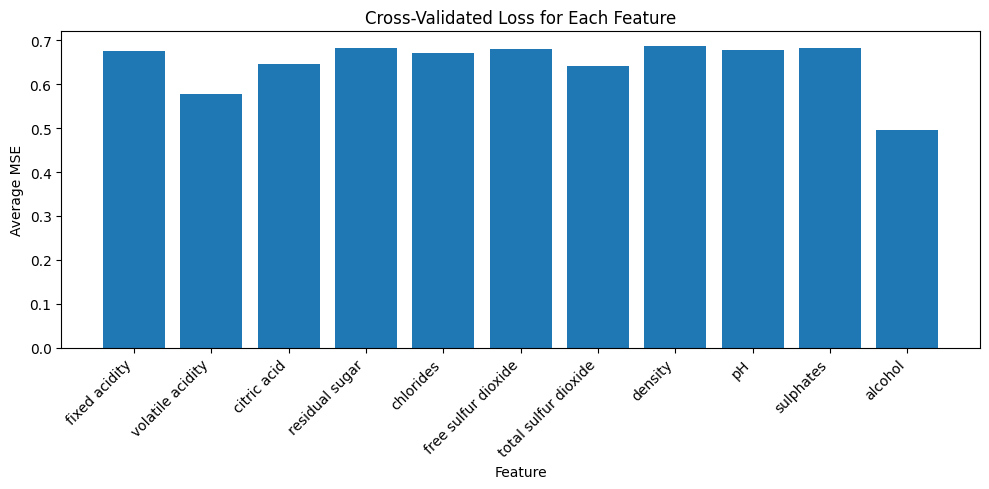

In [21]:
from matplotlib import pyplot as plt

# all_mses is a list of (feature_idx, average_mse)
feature_indices = [idx for idx, mse in all_mses]
loss_values = [mse for idx, mse in all_mses]

feature_columns = list(df.drop(columns=['quality']).columns)
feature_names = [feature_columns[idx] for idx in feature_indices]

plt.figure(figsize=(10, 5))
plt.bar(feature_names, loss_values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Average MSE')
plt.title('Cross-Validated Loss for Each Feature')
plt.tight_layout()
plt.show()

### Ý tưởng thực hiện

- Với mỗi đặc trưng (feature) trong tập dữ liệu:
  - Tách riêng đặc trưng đó tạo thành ma trận cột.
  - Áp dụng kỹ thuật **K-Fold Cross-Validation**:
    - Chia tập dữ liệu thành k phần bằng nhau.
    - Với mỗi lần lặp:
      - Dùng k-1 phần để huấn luyện, 1 phần để kiểm tra.
      - Tính sai số MSE.
    - Tính trung bình MSE qua k lần.
- Chọn đặc trưng có MSE thấp nhất là đặc trưng tốt nhất.

### Mô tả hàm

1. `split_equal(data, k)`
- **Mục đích**: Chia danh sách thành `k` phần bằng nhau hoặc gần bằng nhau.
- **Hoạt động**:
  - Tính kích thước cơ bản cho mỗi phần, xử lý phần dư để phân bố đều.
  - Trả về danh sách các phần đã chia.

---

2. `k_fold_train_val(model_class, X: Matrix, y: Matrix, k=5)`
- **Mục đích**: Thực hiện **K-Fold Cross-Validation** để đánh giá hiệu năng mô hình.
- **Hoạt động**:
  1. Chia dữ liệu thành `k` folds bằng `split_equal`.
  2. Ở mỗi lần lặp:
     - Một fold làm tập validation, các fold còn lại làm tập train.
     - Huấn luyện mô hình, tính **Mean Squared Error (MSE)** trên tập validation.
  3. Trả về giá trị trung bình MSE sau tất cả các folds.

---

3. `select_best_feature_by_cv(model_class, X: Matrix, y: Matrix, k=5)`
- **Mục đích**: Tìm đặc trưng tốt nhất bằng K-Fold Cross-Validation.
- **Hoạt động**:
  1. Lặp qua từng đặc trưng trong ma trận:
     - Trích xuất cột tương ứng từ ma trận đặc trưng.
     - Tính MSE trung bình của từng đặc trưng bằng `k_fold_train_val`.
  2. Chọn đặc trưng có MSE thấp nhất.
  3. Trả về chỉ số đặc trưng tốt nhất, MSE tương ứng, và danh sách MSE của tất cả các đặc trưng.

#3. Mô hình tốt nhất
## Mô hình ban đầu
- Sử dụng toàn bộ đặc trưng của bộ dữ liệu.
- Mô hình trở nên khá phức tạp, dễ bị nhiễu do các đặc trưng không liên quan hoặc ít đóng góp.
- Nguy cơ overfitting cao khi mô hình khớp quá mức với dữ liệu huấn luyện.
- Validation MSE thấp do mô hình không tổng quát hóa tốt.

---> Cần đơn giản hóa mô hình, giảm overfitting và đảm bảo hiệu năng trên tập tốt trên tập validation

---
## Giải pháp: Forward feature selection
### **Phương pháp**:
  - Thêm lần lượt từng đặc trưng vào mô hình, đánh giá Validation MSE sau mỗi lần thêm.
  - Chỉ giữ lại các đặc trưng giúp giảm Validation MSE, loại bỏ các đặc trưng không cần thiết.

### **Lý do chọn**
- Giúp chọn ra tập hợp đặc trưng tối ưu, cải thiện hiệu năng mô hình trên tập validation.
- Loại bỏ các đặc trưng không liên quan hoặc ít đóng góp, giúp mô hình ổn định hơn.
- Kiểm soát độ phức tạp của mô hình bằng cách không thêm các đặc trưng không cải thiện hiệu năng.

In [22]:
def forward_feature_selection(model_class, X: Matrix, y: Matrix, k=5, compare_training_mse=True):
  num_features = len(X.data[0])
  remaining = set(range(num_features))
  selected = []
  best_mse = float('inf')
  history = []

  while remaining:
    best_candidate = None
    best_candidate_mse = float('inf')

    for idx in remaining:
      trial_features = selected + [idx]
      Xi = Matrix([[row[j] for j in trial_features] for row in X.data])
      # Compute the MSE of the model using cross-validation
      mse = k_fold_train_val(model_class, Xi, y, k)

      if mse < best_candidate_mse:
        best_candidate = idx
        best_candidate_mse = mse

    selected.append(best_candidate)
    remaining.remove(best_candidate)
    best_mse = best_candidate_mse
    # If comparing Training MSE is required
    if compare_training_mse:
      Xi_train = Matrix([[row[j] for j in selected] for row in X.data])
      model = model_class()
      model.fit(Xi_train, y)
      train_mse = model.mse(Xi_train, y)
      history.append((selected[:], best_mse, train_mse))
      print(f'Add feature {best_candidate} -> Validation MSE: {best_mse:.4f}, Training MSE: {train_mse:.4f}')
    else:
      history.append((selected[:], best_mse))
      print(f'Add feature {best_candidate} -> Validation MSE: {best_mse:.4f}')

  return {
    'selected_features': selected,
    'validation_mse': best_mse,
    'history': history
  }

In [23]:
from matplotlib import pyplot as plt

def plot_mse_comparison(history, compare_training_mse=True):
  validation_mses = [step[1] for step in history]
  feature_counts = range(1, len(history) + 1)

  plt.figure(figsize=(10, 6))
  plt.plot(feature_counts, validation_mses, label='Validation MSE', color='red', marker='o')

  if compare_training_mse:
    training_mses = [step[2] for step in history]
    plt.plot(feature_counts, training_mses, label='Training MSE', color='blue', marker='x')

  plt.title('Training MSE vs Validation MSE in Forward Feature Selection')
  plt.xlabel('Number of Features Selected')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

Add feature 10 -> Validation MSE: 0.4958, Training MSE: 0.4876
Add feature 1 -> Validation MSE: 0.4415, Training MSE: 0.4362
Add feature 6 -> Validation MSE: 0.4343, Training MSE: 0.4275
Add feature 8 -> Validation MSE: 0.4313, Training MSE: 0.4243
Add feature 4 -> Validation MSE: 0.4300, Training MSE: 0.4229
Add feature 9 -> Validation MSE: 0.4264, Training MSE: 0.4103
Add feature 5 -> Validation MSE: 0.4261, Training MSE: 0.4093
Add feature 2 -> Validation MSE: 0.4269, Training MSE: 0.4086
Add feature 3 -> Validation MSE: 0.4286, Training MSE: 0.4081
Add feature 7 -> Validation MSE: 0.4332, Training MSE: 0.4080
Add feature 0 -> Validation MSE: 0.4353, Training MSE: 0.4072


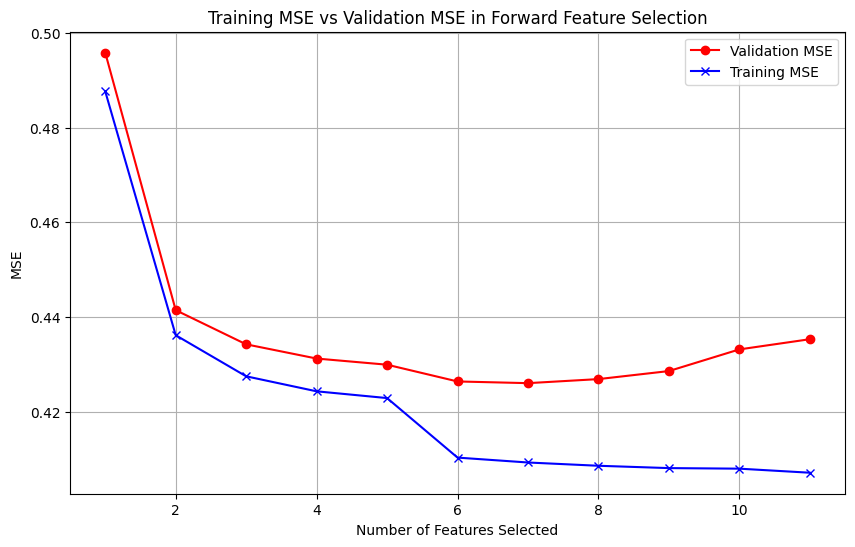

In [24]:
result = forward_feature_selection(LinearRegression, X, y, k=5)

plot_mse_comparison(result['history'])

###Nhận xét
- **Số lượng đặc trưng tối ưu**: Validation MSE giảm nhanh ở giai đoạn đầu (1-2 đặc trưng), sau đó giảm chậm dần, ổn định ở khoảng **4-5 đặc trưng** và tăng liên tục cho các đặc trưng còn lại.

- **Dấu hiệu overfitting**: Khi thêm nhiều hơn 5 đặc trưng, Training MSE tiếp tục giảm nhưng Validation MSE giảm ít, cho thấy mô hình có dấu hiệu overfitting.

- **Kết luận**: Chọn khoảng **4-5 đặc trưng** giúp cân bằng giữa độ phức tạp và khả năng tổng quát hóa của mô hình.

In [25]:
# Best model
indices = [10, 1, 6, 8, 4]
X_selected = Matrix([[row[j] for j in indices] for row in X.data])

model = LinearRegression()
model.fit(X_selected, y)
print(f'MSE: {model.mse(X_selected, y)}')
print(model)

MSE: 0.42290843818459956
Linear regression model (weights: [4.5992, 0.3193, -1.1544, -0.0028, -0.4378, -0.8177])


### Ý tưởng thực hiện
- Bắt đầu với tập đặc trưng rỗng.
- Lặp lại:
  - Thử thêm từng đặc trưng còn lại vào tập hiện tại.
  - Với mỗi tập đặc trưng tạm thời:
    - Dùng **K-Fold Cross-Validation** để đánh giá MSE.
  - Chọn đặc trưng có MSE tốt nhất (nhỏ nhất).
  - Thêm đặc trưng đó vào tập được chọn.
  - Ghi lại lịch sử chọn các đặc trưng.
- Tuỳ chọn: Vẽ biểu đồ so sánh giữa Training MSE và Validation MSE sau từng bước chọn, để có thể đưa ra mô hình tốt nhất.

### Mô tả hàm
1. `forward_feature_selection(model_class, X: Matrix, y: Matrix, k=5, compare_training_mse=True)`
- **Mục đích**: Chọn tập đặc trưng tối ưu cho mô hình bằng phương pháp Forward Feature Selection.
- **Hoạt động**:
  - Bắt đầu với một tập rỗng các đặc trưng được chọn.
  - Lặp qua các đặc trưng còn lại, thêm đặc trưng nào giúp giảm Validation MSE nhiều nhất.
  - Ghi lại lịch sử thêm các đặc trưng và MSE.
---
2. `plot_mse_comparison(history, compare_training_mse=Ture)`
- **Mục đích**: Trực quan hóa quá trình chọn lọc đặc trưng bằng cách so sánh **Training MSE** và **Validation MSE** theo số lượng đặc trưng được chọn.
- **Hoạt động**:
  - Lấy **Validation MSE** và **Training MSE** (nếu có) từ lịch sử chọn lọc (`history`).
  - Vẽ đồ thị với:
    - Trục X: Số lượng đặc trưng được chọn.
    - Trục Y: Giá trị MSE.
  - Hiển thị đường biểu diễn cho Validation MSE (màu đỏ) và, nếu có, Training MSE (màu xanh).